In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing, decomposition

import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

Dataset: [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)

In [2]:
# Read the data - directly from the web!
#                 column names are separate, so we add them manually
data = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None,
    names = ['sepal_l_cm', 'sepal_w_cm', 'petal_l_cm', 'petal_w_cm', 'species'],
    sep=',')

# Output the data (notice Pandas will split long files)
data

sepal_l_cm  sepal_w_cm  petal_l_cm  petal_w_cm         species
0           5.1         3.5         1.4         0.2     Iris-setosa
1           4.9         3.0         1.4         0.2     Iris-setosa
2           4.7         3.2         1.3         0.2     Iris-setosa
3           4.6         3.1         1.5         0.2     Iris-setosa
4           5.0         3.6         1.4         0.2     Iris-setosa
5           5.4         3.9         1.7         0.4     Iris-setosa
6           4.6         3.4         1.4         0.3     Iris-setosa
7           5.0         3.4         1.5         0.2     Iris-setosa
8           4.4         2.9         1.4         0.2     Iris-setosa
9           4.9         3.1         1.5         0.1     Iris-setosa
10          5.4         3.7         1.5         0.2     Iris-setosa
11          4.8         3.4         1.6         0.2     Iris-setosa
12          4.8         3.0         1.4         0.1     Iris-setosa
13          4.3         3.0         1.1         0.1     Iris-setosa
14          5.8         4.0         1.2         0.2     Iris-setosa
15          5.7         4.4         1.5         0.4     Iris-setosa
16          5.4         3.9         1.3         0.4     Iris-setosa
17          5.1         3.5         1.4         0.3     Iris-setosa
18          5.7         3.8         1.7         0.3     Iris-setosa
19          5.1         3.8         1.5         0.3     Iris-setosa
20          5.4         3.4         1.7         0.2     Iris-setosa
21          5.1         3.7         1.5         0.4     Iris-setosa
22          4.6         3.6         1.0         0.2     Iris-setosa
23          5.1         3.3         1.7         0.5     Iris-setosa
24          4.8         3.4         1.9         0.2     Iris-setosa
25          5.0         3.0         1.6         0.2     Iris-setosa
26          5.0         3.4         1.6         0.4     Iris-setosa
27          5.2         3.5         1.5         0.2     Iris-setosa
28          5.2         3.4         1.4         0.2     Iris-setosa
29          4.7         3.2         1.6         0.2     Iris-setosa
..          ...         ...         ...         ...             ...
120         6.9         3.2         5.7         2.3  Iris-virginica
121         5.6         2.8         4.9         2.0  Iris-virginica
122         7.7         2.8         6.7         2.0  Iris-virginica
123         6.3         2.7         4.9         1.8  Iris-virginica
124         6.7         3.3         5.7         2.1  Iris-virginica
125         7.2         3.2         6.0         1.8  Iris-virginica
126         6.2         2.8         4.8         1.8  Iris-virginica
127         6.1         3.0         4.9         1.8  Iris-virginica
128         6.4         2.8         5.6         2.1  Iris-virginica
129         7.2         3.0         5.8         1.6  Iris-virginica
130         7.4         2.8         6.1         1.9  Iris-virginica
131         7.9         3.8         6.4         2.0  Iris-virginica
132         6.4         2.8         5.6         2.2  Iris-virginica
133         6.3         2.8         5.1         1.5  Iris-virginica
134         6.1         2.6         5.6         1.4  Iris-virginica
135         7.7         3.0         6.1         2.3  Iris-virginica
136         6.3         3.4         5.6         2.4  Iris-virginica
137         6.4         3.1         5.5         1.8  Iris-virginica
138         6.0         3.0         4.8         1.8  Iris-virginica
139         6.9         3.1         5.4         2.1  Iris-virginica
140         6.7         3.1         5.6         2.4  Iris-virginica
141         6.9         3.1         5.1         2.3  Iris-virginica
142         5.8         2.7         5.1         1.9  Iris-virginica
143         6.8         3.2         5.9         2.3  Iris-virginica
144         6.7         3.3         5.7         2.5  Iris-virginica
145         6.7         3.0         5.2         2.3  Iris-virginica
146         6.3         2.5         5.0         1.9  Iris-vir

In [3]:
# So as to not fool ourselves, let's split on input data/class label
# In an unsupervised setting, we might not have the class label,
# or use it only for final evaluation
X = data.iloc[:,0:-1]
Y = data.iloc[:, -1]
data = None

In [4]:
# Just to confirm...
X

sepal_l_cm  sepal_w_cm  petal_l_cm  petal_w_cm
0           5.1         3.5         1.4         0.2
1           4.9         3.0         1.4         0.2
2           4.7         3.2         1.3         0.2
3           4.6         3.1         1.5         0.2
4           5.0         3.6         1.4         0.2
5           5.4         3.9         1.7         0.4
6           4.6         3.4         1.4         0.3
7           5.0         3.4         1.5         0.2
8           4.4         2.9         1.4         0.2
9           4.9         3.1         1.5         0.1
10          5.4         3.7         1.5         0.2
11          4.8         3.4         1.6         0.2
12          4.8         3.0         1.4         0.1
13          4.3         3.0         1.1         0.1
14          5.8         4.0         1.2         0.2
15          5.7         4.4         1.5         0.4
16          5.4         3.9         1.3         0.4
17          5.1         3.5         1.4         0.3
18          5.7         3.8         1.7         0.3
19          5.1         3.8         1.5         0.3
20          5.4         3.4         1.7         0.2
21          5.1         3.7         1.5         0.4
22          4.6         3.6         1.0         0.2
23          5.1         3.3         1.7         0.5
24          4.8         3.4         1.9         0.2
25          5.0         3.0         1.6         0.2
26          5.0         3.4         1.6         0.4
27          5.2         3.5         1.5         0.2
28          5.2         3.4         1.4         0.2
29          4.7         3.2         1.6         0.2
..          ...         ...         ...         ...
120         6.9         3.2         5.7         2.3
121         5.6         2.8         4.9         2.0
122         7.7         2.8         6.7         2.0
123         6.3         2.7         4.9         1.8
124         6.7         3.3         5.7         2.1
125         7.2         3.2         6.0         1.8
126         6.2         2.8         4.8         1.8
127         6.1         3.0         4.9         1.8
128         6.4         2.8         5.6         2.1
129         7.2         3.0         5.8         1.6
130         7.4         2.8         6.1         1.9
131         7.9         3.8         6.4         2.0
132         6.4         2.8         5.6         2.2
133         6.3         2.8         5.1         1.5
134         6.1         2.6         5.6         1.4
135         7.7         3.0         6.1         2.3
136         6.3         3.4         5.6         2.4
137         6.4         3.1         5.5         1.8
138         6.0         3.0         4.8         1.8
139         6.9         3.1         5.4         2.1
140         6.7         3.1         5.6         2.4
141         6.9         3.1         5.1         2.3
142         5.8         2.7         5.1         1.9
143         6.8         3.2         5.9         2.3
144         6.7         3.3         5.7         2.5
145         6.7         3.0         5.2         2.3
146         6.3         2.5         5.0         1.9
147         6.5         3.0         5.2         2.0
148         6.2         3.4         5.4         2.3
149         5.9         3.0         5.1         1.8

[150 rows x 4 columns]

# Data Exploration

In [5]:
# TODO: Use the describe method to output a table of basic stats on all of X's columns
X.describe()

sepal_l_cm  sepal_w_cm  petal_l_cm  petal_w_cm
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10be1ae80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bf63f98>]], dtype=object)

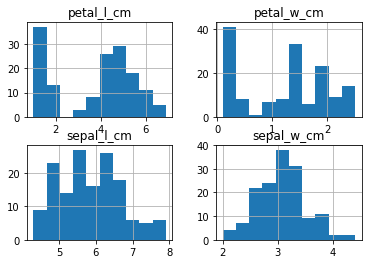

In [6]:
# TODO: Use the hist method to output histograms of all of X's columns
X.hist()

## Supervised Visualization
While not something we can always do, let's plot each feature with its corresponding species

In [7]:
distinct_species = Y.unique()

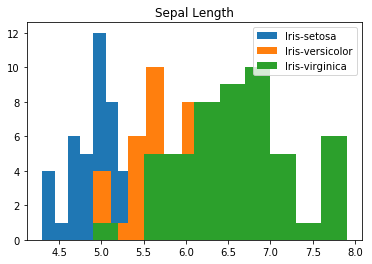

In [8]:
for species in distinct_species:
    plt.hist([X.loc[p].sepal_l_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Sepal Length')
plt.legend(loc='upper right')

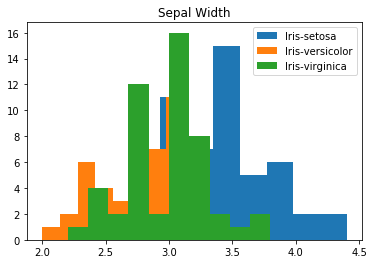

In [9]:
for species in distinct_species:
    plt.hist([X.loc[p].sepal_w_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Sepal Width')
plt.legend(loc='upper right')

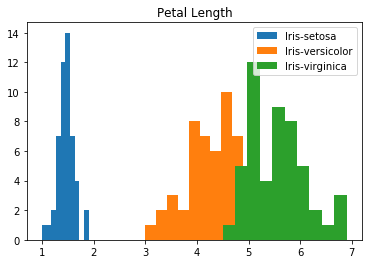

In [10]:
for species in distinct_species:
    plt.hist([X.loc[p].petal_l_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Petal Length')
plt.legend(loc='upper right')

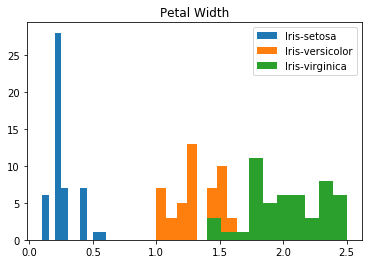

In [11]:
for species in distinct_species:
    plt.hist([X.loc[p].petal_w_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Petal Width')
plt.legend(loc='upper right')

The above histograms, especially the ones with respect to `petal width` and `petal length` show a good degree of separation among output classes. Hence, dimensionality reduction might be a useful approach to consider for classification. Maybe reducing the dimensions to 2 would give good results.

# Preprocessing
Before we apply PCA, all features should be normalized such that mean=0, std=0

In [12]:
X_std = preprocessing.StandardScaler().fit_transform(X)

In [13]:
# Get the newly standardized data back into a Pandas DataFrame data structure for convenience
X_std = pd.DataFrame(X_std, columns=list(X))

In [14]:
# TODO: use describe to confirm mean/variance has changed
X_std.describe()

sepal_l_cm    sepal_w_cm    petal_l_cm    petal_w_cm
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c65e828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c7fa160>]], dtype=object)

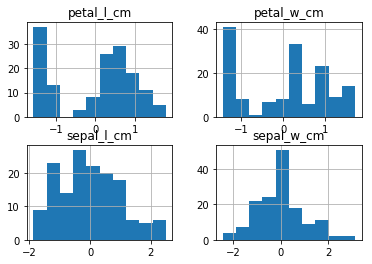

In [15]:
# Use hist to confirm that the columns have the same relative shapes as before preprocessing
X_std.hist()

# Computing the Covariance Matrix
In order to perform PCA with the eigendecomposition, we will need the covariance matrix

In [16]:
# use NumPy's cov function to compute the covariance matrix of X_std
#       NOTE! it expects each row to be all the values of a feature
#             SO... give it the transpose of X_std
print(np.cov(X_std.T))

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [17]:
# get n via the shape attribute
n = X_std.shape[0]
n

150

In [18]:
# a quick way to perform matrix multiplication is the @ operator
# NOTE! access the data in the DataFrame via the "values" attribute
X_std_cov = (1/(n-1)) * (X_std.T.values @ X_std.values)

# check that your covariance = NumPy above
X_std_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

The dimensions of the matrix in our case is just (150 x 150). In real datasets with millions of observations, it is very inefficient to store a (million x million) matrix in memory and even worse, to multiply two such matrices. 

# Eigendecomposition vs SVD

In [19]:
# Use the eig linear algebra function of NumPy to compute the eigendecomposition
eigvals, eigvecs = np.linalg.eig(X_std_cov)

print("Values:", eigvals)
print()
print("Vectors:", eigvecs)

Values: [ 2.93035378  0.92740362  0.14834223  0.02074601]

Vectors: [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [20]:
# Use the svd linear algebra function of NumPy to compute the SVD
# Note! as with cov, use the transpose
svd_u,svd_s,svd_v = np.linalg.svd(X_std_cov)

print("U:", svd_u)
print()
print("S:", svd_s)
print()
print("V:", svd_v)

U: [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

S: [ 2.93035378  0.92740362  0.14834223  0.02074601]

V: [[-0.52237162  0.26335492 -0.58125401 -0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


The eigenvalue vector and singular vector of SVD are the same in our case, though this is not the case always. This is because the matrix we are using is symmetric. The right-singular vectors of `X_std_cov` are a set of orthonormal eigenvectors of `X_std_cov`. For example, vectors v1 = [0.52237162, -0.37231836, -0.72101681, 0.26199559], v2 = [-0.52237162, -0.37231836, 0.72101681, 0.26199559] are orthornormal. (Proof in the cell below)

The values being identical do not matter because for two vectors to be orthonormal, both their l2 norms should be 1 and they should be perpendicular to each other. This means that the absolute values of the vector components should match though their signs are different. (Proof in the cell below)

In [21]:
# Proof of orthonormality
def l2(v):
    return sum(n**2 for n in v)**(0.5)
    
def cosine_sim(v1, v2):
    numerator = sum(n1*n2 for n1, n2 in zip(v1, v2))
    denominator = l2(v1) * l2(v2)
    return numerator / denominator

v1 = [0.52237162, -0.37231836, -0.72101681, 0.26199559]
v2 = [-0.52237162, -0.37231836, 0.72101681, 0.26199559]
print(cosine_sim(v1, v2))
print(l2(v1))
print(l2(v2))

-0.5854746992783613
1.000000000028269
1.000000000028269


# Selecting Components
To make the decision about which components to keep, we typically keep those that explain the most variance.

NOTE: the eigenvalues/S should be sorted descending before performing these steps (may already be done)

## Variance via Eigendecomposition
Explained variance is simply each eigenvalue as a proportion of the sum of the eigenvalues

In [22]:
prop_eig = [e/sum(eigvals) for e in eigvals]

print(sum(prop_eig))
print(prop_eig)

1.0
[0.72770452093801319, 0.23030523267680639, 0.036838319576273884, 0.0051519268089063918]


## Variance via SVD
Explained variance is each value in S **squared** divided by the sum of all values **squared**:

$$ \frac{s^2}{\sum_i s_i^2} $$

In [23]:
# TODO: implement for SVD
svd_sum =  sum(s*s for s in svd_s)
prop_svd = [(s*s)/svd_sum for s in svd_s]

print(sum(prop_svd))
print(prop_svd)

1.0
[0.9068045256015802, 0.090826199870374658, 0.002323823584653354, 4.5450943391873172e-05]


## Plot Explained Variance

array([ 0.72770452,  0.95800975,  0.99484807,  1.        ])

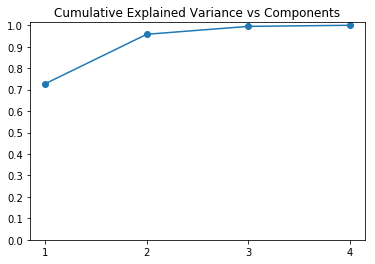

In [24]:
plt.plot([x+1 for x in range(len(prop_eig))], np.cumsum(prop_eig), '-o')

plt.yticks(np.linspace(0, 1, 11, endpoint=True))
plt.xticks(np.linspace(1, len(prop_eig), len(prop_eig), endpoint=True))
plt.title('Cumulative Explained Variance vs Components')

np.cumsum(prop_eig)

In [25]:
# Set the following variable to the number of components needed to explain 90% of the variance
numpcs = 2

## PCA
Now that we've done this by hand, notice the easy shortcut :)

In [26]:
skl_pca = sklearn.decomposition.PCA(n_components=numpcs).fit(X_std)

print("Components:", skl_pca.components_)
print()
print("S:", skl_pca.singular_values_)
print()
print("Explained Variance: ", skl_pca.explained_variance_ratio_)

Components: [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

S: [ 20.89551896  11.75513248]

Explained Variance:  [ 0.72770452  0.23030523]


# Visualizing the Projected Data
Now let's project the data into the space defined by our top components (where $W_k$ is the matrix of the $k$ top eigenvectors): $ X_{proj} = X_{std}W_k $

In [27]:
# TODO: extract the first k eigenvectors
W = eigvecs[:,:numpcs]

print("W_{}={}".format(numpcs, W))

W_2=[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [28]:
# Dimensions
print(X_std.shape)
print(W.shape)

(150, 4)
(4, 2)


In [29]:
# TODO: matrix multiply! (remember @ for shortcut)
X_proj = X_std @ W

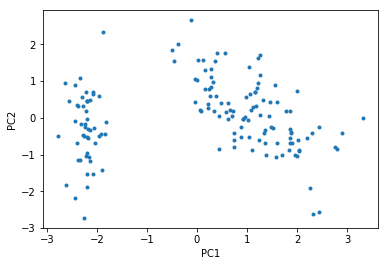

In [30]:
plt.plot(X_proj[:,0], X_proj[:,1], '.')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Supervised Visualization
Since we have the actual species, let's overlay this data

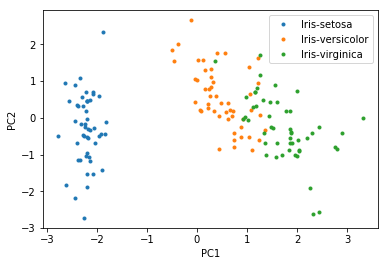

In [31]:
for species in distinct_species:
    plt.plot([X_proj[p, 0] for p in Y[Y.isin([species])].index], [X_proj[p, 1] for p in Y[Y.isin([species])].index], '.', label=species)
    
plt.legend(loc='upper right')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Interpreting the Components

In [32]:
one = pd.Series(eigvecs[:, 0], index=X.columns)
one.sort_values(ascending=False)

petal_l_cm    0.581254
petal_w_cm    0.565611
sepal_l_cm    0.522372
sepal_w_cm   -0.263355
dtype: float64

In [33]:
two = pd.Series(eigvecs[:, 1], index=X.columns)
two.sort_values(ascending=False)

petal_l_cm   -0.021095
petal_w_cm   -0.065416
sepal_l_cm   -0.372318
sepal_w_cm   -0.925556
dtype: float64